# Grid refinement

The purpose of this package is to provide simple functions to refine the radial grid around certain locations.

In this example we want to refine the grid at a distance of $10\,\mathrm{au}$. We first create a `DustPy` simulation object.

In [1]:
from dustpy import Simulation
from dustpy import constants as c

In [2]:
r0 = 10. * c.au

In [3]:
s = Simulation()

Since we want to provide a custom grid, we do not initialize the simulation object at this point. Instead we create our own grid cell interfaces, which are at this points identical to the default interfaces.

In [4]:
import numpy as np

In [5]:
ri = np.geomspace(s.ini.grid.rmin, s.ini.grid.rmax, s.ini.grid.Nr)

We can now use the helper function `refine_radial_local()` to locally refine our grid. We do this for different refinement levels to demonstrate the differences.

In [6]:
from dustpylib.grid.refinement import refine_radial_local

In [7]:
ri_fine_1 = refine_radial_local(ri, r0, num=1)
ri_fine_3 = refine_radial_local(ri, r0, num=3)
ri_fine_5 = refine_radial_local(ri, r0, num=5)

We can plot the cummulative distribution of grid cell interfaces.

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150.

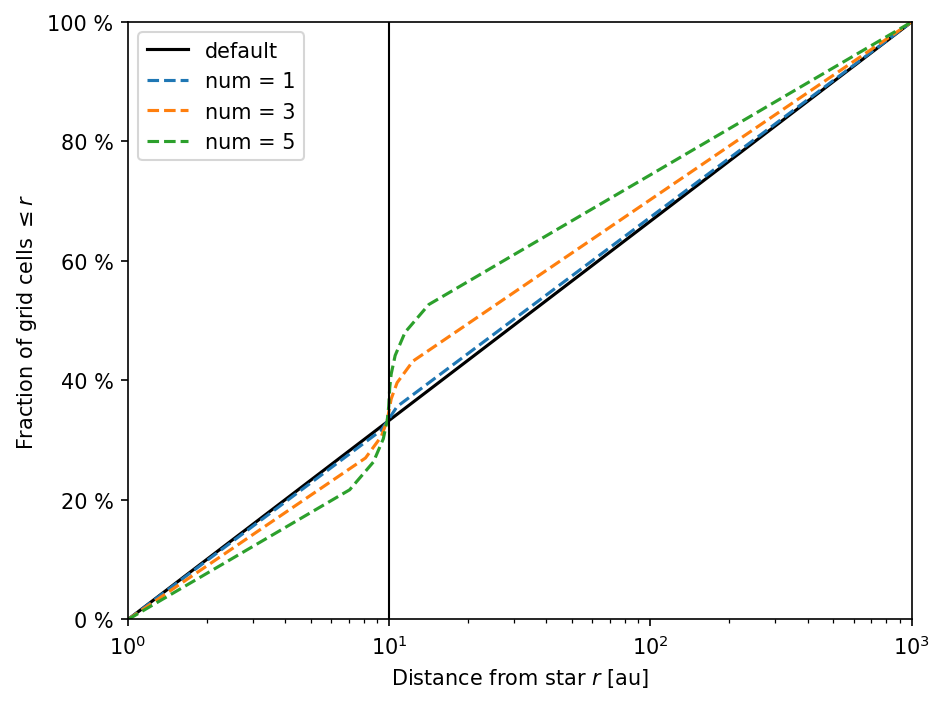

In [9]:
fig, ax = plt.subplots()
ax.semilogx(ri/c.au, np.linspace(0., 100., ri.shape[0]), label="default", color="black")
ax.semilogx(ri_fine_1/c.au, np.linspace(0., 100., ri_fine_1.shape[0]), "--", label="num = 1")
ax.semilogx(ri_fine_3/c.au, np.linspace(0., 100., ri_fine_3.shape[0]), "--", label="num = 3")
ax.semilogx(ri_fine_5/c.au, np.linspace(0., 100., ri_fine_5.shape[0]), "--", label="num = 5")
ax.axvline(r0/c.au, lw=1, color="black")
ax.set_xlim(ri[0]/c.au, ri[-1]/c.au)
ax.set_ylim(0., 100.)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:.0f} %".format(t) for t in ax.get_yticks()])
ax.set_xlabel("Distance from star $r$ [au]")
ax.set_ylabel("Fraction of grid cells $\leq r$")
ax.legend()
fig.tight_layout()

To initialize the model with the new refined grid we have to set the radial grid cell interfaces before initialization.

In [10]:
s.grid.ri = ri_fine_3

In [11]:
s.initialize()

The model can now be run with the new grid with `su.run()`.

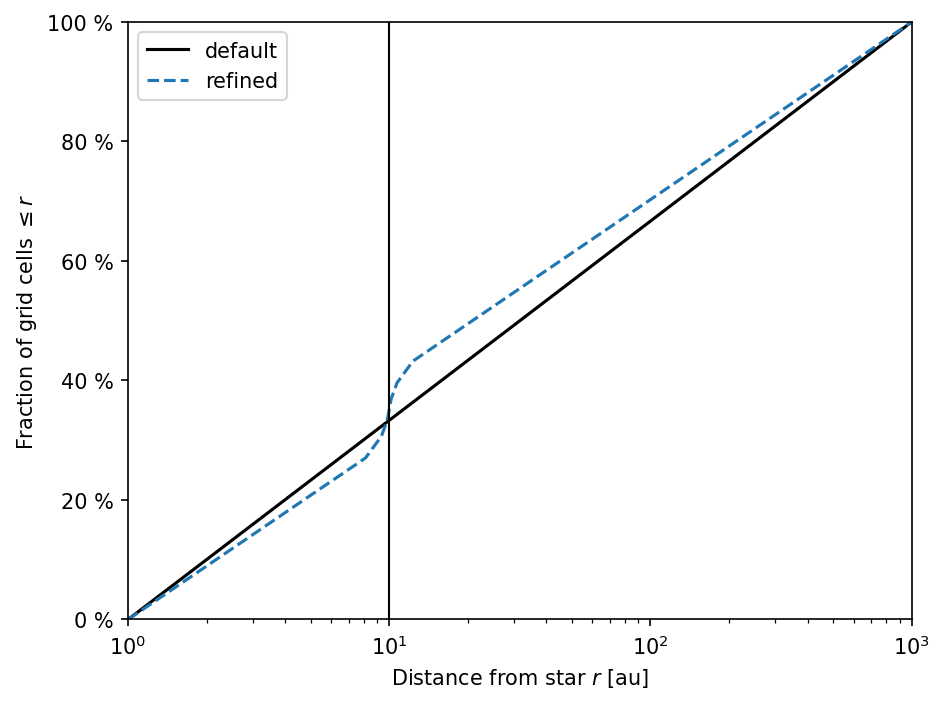

In [12]:
fig, ax = plt.subplots()
ax.semilogx(ri/c.au, np.linspace(0., 100., ri.shape[0]), label="default", color="black")
ax.semilogx(s.grid.ri/c.au, np.linspace(0., 100., s.grid.ri.shape[0]), "--", label="refined")
ax.axvline(r0/c.au, lw=1, color="black")
ax.set_xlim(ri[0]/c.au, ri[-1]/c.au)
ax.set_ylim(0., 100.)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:.0f} %".format(t) for t in ax.get_yticks()])
ax.set_xlabel("Distance from star $r$ [au]")
ax.set_ylabel("Fraction of grid cells $\leq r$")
ax.legend()
fig.tight_layout()